<span style="color:black; font-size:21px; font-weight:bold;">Liquor Sales Project - by Workearly</span>


<span style="color:black; font-size:18px; font-weight:bold;">1.1 Introduction</span>




<span style="color:black; font-size:14px;">The analysis will begin by extracting data from a database using MySQL Workbench. Subsequently, we will import the dataset into Python, utilizing the Pandas package, to thoroughly examine its contents. By employing advanced data manipulation techniques, we will aggregate the table to determine the most popular item sold, taking into account the sales distribution based on zip code and the percentage of sales per store. To provide visual representation, we will utilize the Matplotlib package to generate insightful visualizations.</span>




<span style="color:black; font-size:18px; font-weight:bold;">2. Query the database using MySQL Workbench to get data between 2016 and 2019</span>


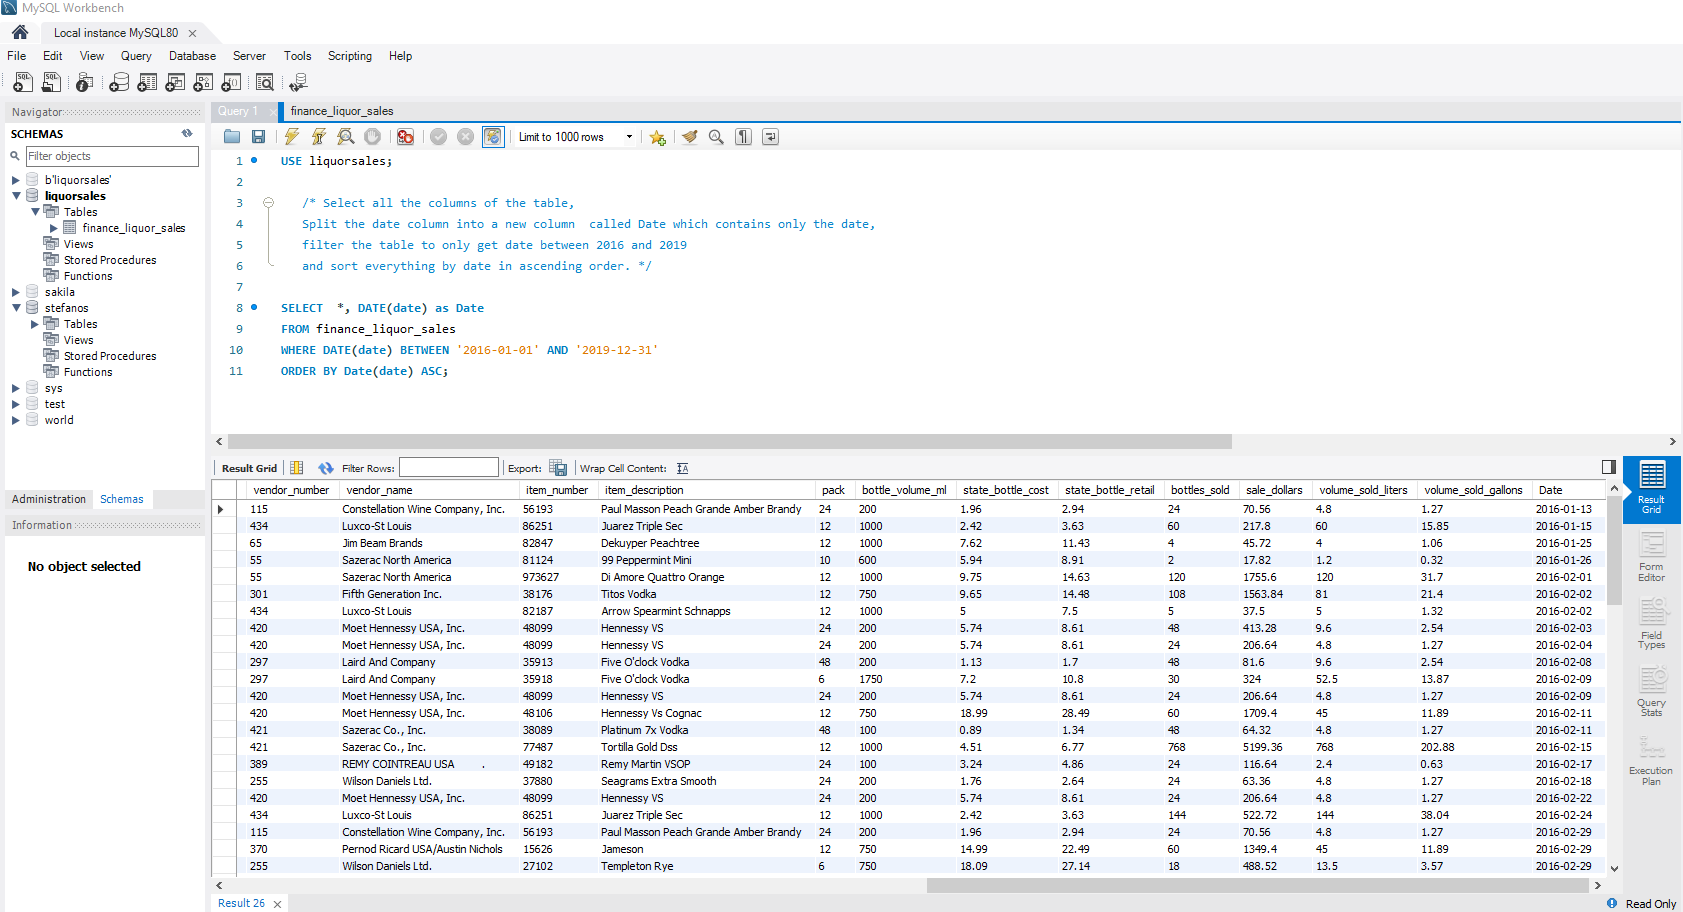

<span style="color:black; font-size:18px; font-weight:bold;">3.1 Read the newly made csv using Python and import pandas, numpy and matplotlib</span>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




#Read the file and see what columns exist in the table
df = pd.read_csv('liquor_sales.csv')
df.columns





Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'Date'],
      dtype='object')

In [5]:
#Check how many rows and columns there are
df.shape

(74, 25)

In [6]:
# Quick descriptive analysis
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,3706.472973,51185.756757,51.445946,1.114542e+06,287.486486,117115.635135,14.175676,756.756757,7.829865,11.746622,76.148649,827.921351,72.226622,19.078514
std,1193.348520,900.102564,29.430737,1.838894e+05,162.181975,227020.971218,8.235170,413.602145,6.413200,9.619979,157.586478,1429.173301,165.173543,43.633755
min,2178.000000,50010.000000,3.000000,1.011500e+06,35.000000,168.000000,3.000000,50.000000,0.890000,1.340000,1.000000,6.750000,0.200000,0.050000
25%,2616.750000,50320.000000,23.500000,1.052100e+06,77.500000,43031.000000,12.000000,375.000000,4.255000,6.382500,5.000000,46.102500,4.000000,1.060000
50%,3536.500000,50754.000000,57.000000,1.081100e+06,370.000000,60971.500000,12.000000,750.000000,5.730000,8.595000,24.000000,206.640000,7.800000,2.060000
75%,4761.500000,52163.000000,77.000000,1.081650e+06,421.000000,82682.000000,12.000000,1000.000000,8.937500,13.407500,70.500000,713.340000,60.000000,15.850000
max,9001.000000,52804.000000,97.000000,1.901200e+06,566.000000,986845.000000,48.000000,1750.000000,29.920000,44.880000,900.000000,6750.000000,900.000000,237.750000


In [7]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'Date'],
      dtype='object')

<span style="color:black; font-size:18px; font-weight:bold;">3.2 Transform data by deleting unnecessary columns</span>


In [8]:
# Delete columns that are not needed in the analysis
columns_to_drop = ['store_number', 'county_number', 'invoice_and_item_number', 'date', 'volume_sold_liters', 'volume_sold_gallons']
df.drop(columns_to_drop, axis=1, inplace=True)


In [9]:
#View the new table 
df.head()

,store_name,address,city,zip_code,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,Date
0,Shop N Save #1 / Mlk Pkwy,2127 M L KING JR PKWY,DES MOINES,50314.0,NaN,Polk,1051140,PEACH BRANDIES,115,"Constellation Wine Company, Inc.",56193,Paul Masson Peach Grande Amber Brandy,24,200,1.96,2.94,24,70.56,2016-01-13
1,Central City 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POINT (-93.613739 41.60572),Polk,1081400,TRIPLE SEC,434,Luxco-St Louis,86251,Juarez Triple Sec,12,1000,2.42,3.63,60,217.80,2016-01-15
2,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),Muscatine,1081330,PEACH SCHNAPPS,65,Jim Beam Brands,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,2016-01-25
3,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),Pottawattamie,1081380,MISCELLANEOUS SCHNAPPS,55,Sazerac North America,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,2016-01-26
4,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),Polk,1081700,DISTILLED SPIRITS SPECIALTY,55,Sazerac North America,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,2016-02-01


<span style="color:black; font-size:18px; font-weight:bold;">3.3 Aggregate the CSV data to get the most popular item sold based on zip code and percentage of sales per store.</span>


In [11]:
# Check if there are any missing values in the dataframe
missing_values = df.isnull().any(axis=1)
if missing_values.any():
    print("There are missing values")
else: 
    print("No missing values found")

There are missing values


In [12]:
#remove the rows that contain missing values
df = df[~missing_values]

In [13]:
#Check if the missing values are removed
missing_values = df.isnull().any(axis=1)
if missing_values.any():
    print("There are missing values")
else: 
    print("No missing values found")

No missing values found


In [14]:
#Group by 'zip_code', 'item_description' based on the amount of 'bottles_sold'
df.groupby(['zip_code', 'item_description'])['bottles_sold'].sum().reset_index()


,zip_code,item_description,bottles_sold
0,50010.0,Member's Mark Spiced Rum,288
1,50022.0,Paramount Triple Sec,4
2,50131.0,Platinum 7x Vodka,48
3,50158.0,Kahlua Coffee,3
4,50158.0,Kamora Coffee Liqueur,6
5,50263.0,Jagermeister w/2 Shot Glasses,84
6,50265.0,Kahlua Coffee,72
7,50266.0,Avion Silver w/Powell & Mahoney Margarita Mix,90
8,50314.0,Juarez Triple Sec,240
9,50317.0,Paul Masson Peach Grande Amber Brandy,24


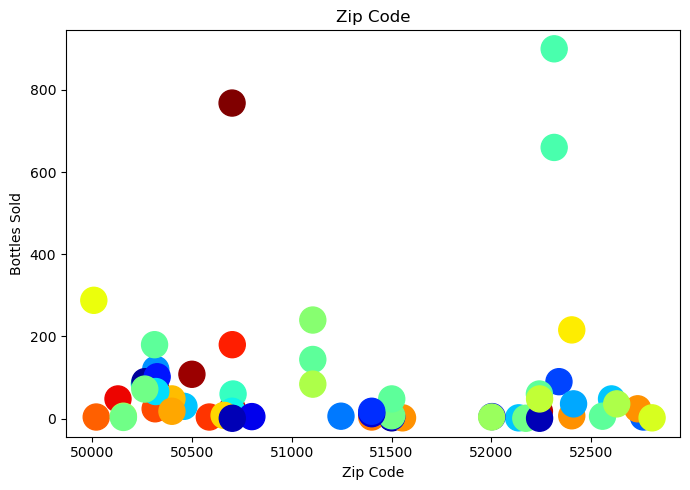

In [15]:
# Prepare the data for plotting
zip_code = df['zip_code']
item_description = df['item_description']
bottles_sold = df['bottles_sold']

# Assign unique numerical labels to each distinct item_description
labels = df['item_description'].astype('category').cat.codes

# Create the scatter plot
plt.figure(figsize=(7, 5))
scatter = plt.scatter(zip_code, bottles_sold, s=350, c=labels, cmap='jet')

# Set the labels and title
plt.xlabel('Zip Code')
plt.ylabel('Bottles Sold')
plt.title('Zip Code')



# Display the plot
plt.tight_layout()
plt.show()


<span style="color:black; font-size:18px; font-weight:bold;">3.3 Aggregate data to get and vizualize the percentage of sales per store and </span>


In [16]:
# Calculate the total sales per store
total_sales = df.groupby('store_name')['sale_dollars'].sum()
print(total_sales)

store_name
Bootleggin' Barzini's Fin                   6.75
CVS Pharmacy #8526 / Cedar Rapids          42.00
Cedar Ridge Vineyards                    3712.50
Central City 2                            871.20
Depot Liquor & Grocery                    112.47
Double D Liquor Store                       9.74
Famous Liquors                             17.98
Fareway Stores #067 / Evansdale          1349.40
Fareway Stores #138 / Pleasant Hill      2295.00
Fareway Stores #153  /  W Des Moines     1349.28
Fareway Stores #409 / Carroll              32.52
Fareway Stores #412 / Oelwein             105.04
Fareway Stores #597 / Creston              71.25
Food Land Super Markets                    13.26
Hy-Vee #3 / BDI / Des Moines             4124.04
Hy-Vee #7 / Cedar Rapids                  486.00
Hy-Vee / Waukee                          1518.72
Hy-Vee Drugstore / Council Bluffs          17.82
Hy-Vee Food Store #1 / Mason City         900.24
Hy-Vee Food Store #2 / Waterloo          1992.15
Hy-Vee Fo

In [17]:
# Calculate the percentage of sales per store
percentage_sales = (total_sales / total_sales.sum()) * 100
print(percentage_sales)

store_name
Bootleggin' Barzini's Fin                0.011932
CVS Pharmacy #8526 / Cedar Rapids        0.074242
Cedar Ridge Vineyards                    6.562488
Central City 2                           1.539997
Depot Liquor & Grocery                   0.198810
Double D Liquor Store                    0.017217
Famous Liquors                           0.031783
Fareway Stores #067 / Evansdale          2.385299
Fareway Stores #138 / Pleasant Hill      4.056811
Fareway Stores #153  /  W Des Moines     2.385087
Fareway Stores #409 / Carroll            0.057485
Fareway Stores #412 / Oelwein            0.185676
Fareway Stores #597 / Creston            0.125947
Food Land Super Markets                  0.023439
Hy-Vee #3 / BDI / Des Moines             7.289957
Hy-Vee #7 / Cedar Rapids                 0.859089
Hy-Vee / Waukee                          2.684601
Hy-Vee Drugstore / Council Bluffs        0.031500
Hy-Vee Food Store #1 / Mason City        1.591330
Hy-Vee Food Store #2 / Waterloo        

In [18]:
# Sort the stores by percentage of sales
percentage_sales_sorted = percentage_sales.sort_values(ascending=False)
print(percentage_sales_sorted)


store_name
Wilkie Liquors                          20.541781
Sam's Club 6432 / Sioux City            11.739191
Sam's Club 6514 / Waterloo               9.190771
Hy-Vee #3 / BDI / Des Moines             7.289957
Sam's Club 6568 / Ames                   6.918533
Cedar Ridge Vineyards                    6.562488
Hy-Vee Wine and Spirits / WDM            5.961126
Fareway Stores #138 / Pleasant Hill      4.056811
Hy-Vee Food Store #2 / Waterloo          3.521471
Hy-Vee Food Store / Fort Dodge           2.764359
Hy-Vee / Waukee                          2.684601
Fareway Stores #067 / Evansdale          2.385299
Fareway Stores #153  /  W Des Moines     2.385087
Hy-Vee Food Store #1 / Mason City        1.591330
Central City 2                           1.539997
Hy-Vee Food Store #3 / Waterloo          1.427997
Hy-Vee Food Store / Carroll              1.303589
Hy-Vee Wine and Spirits / Iowa City      1.248543
Sam's Club 8162 / Cedar Rapids           1.221816
Hy-Vee Food Store / Coralville         

<span style="color:black; font-size:18px; font-weight:bold;">3.4 Bubble chart made in Tableau</span>


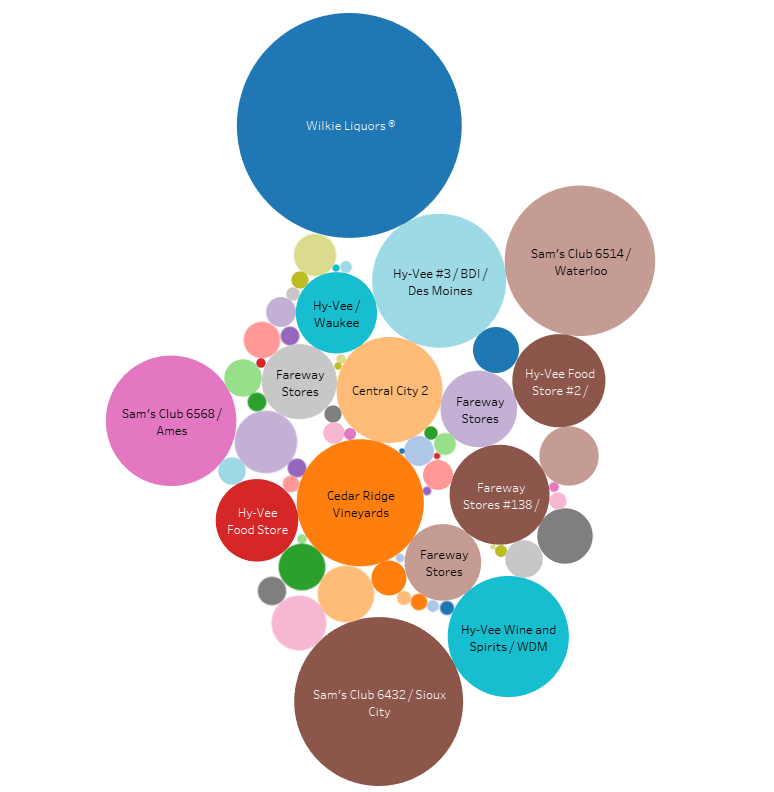

<span style="color:black; font-size:18px; font-weight:bold;">4. Conclusion.</span>


<span style="color:black; font-size:15px;">In conclusion, based on the analysis of the project, the following key findings were observed:

a) Wilkie Liquors emerged as the store with the highest percentage of sales. This indicates that Wilkie Liquors has a significant market share and performs exceptionally well in terms of sales.

b) The top 4 stores, including Wilkie Liquors, collectively accounted for a substantial market share. Their combined sales outperformed all the other stores combined. This highlights the dominance and competitiveness of these top-performing stores in the market.

c) Among the various items sold, Juarez Gold Dss ranked as the most popular item, followed by Tortilla Gold Dss. These findings suggest a strong consumer preference for these particular products, indicating their popularity and potential profitability.

d) On the other hand, Bacardi gold and Kahlua coffee were observed to have the lowest sales figures. This implies that these items might have lower demand or face challenges in attracting customers compared to other products in the market.

In summary, the analysis reveals the outstanding performance of Wilkie Liquors in terms of sales, the dominance of the top 4 stores in the market, the popularity of Juarez Gold Dss and Tortilla Gold Dss, and the comparatively lower sales of Bacardi gold and Kahlua coffee. These findings provide valuable insights for decision-making and strategic planning in the context of the project. </span>


